In [1]:
!pip install gradio

  Using cached asgiref-3.5.2-py3-none-any.whl (22 kB)
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=30e71c97d3ce174d0f9d0732679c2d0d5c1613b28450daff77d7800811dd66c3
  Stored in directory: c:\users\saritha\appdata\local\pip\cache\wheels\91\e2\96\f676aa08bfd789328c6576cd0f1fde4a3d686703bb0c247697
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31678 sha256=243ffb87dd2ce146e5a9e81aa31496f70eb9c93b22a818c3c6efcc215dfa5858
  Stored in directory: c:\users\saritha\appdata\local\pip\cache\wheels\fe\04\d1\a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built ffmpy python-multipart


In [1]:
import gradio as gr


In [4]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=6a79eda95f4269bd41e47c214e7bd63ce87ce1dcecafa8d896bcae7a191920a2
  Stored in directory: c:\users\saritha\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
import pathlib
DATADIR='C:/Users/SARITHA/Desktop/Herbal Plant Identification/images'
CATAGORIES=['Aloe Vera','Agati leaves','Basil','Betel','Catnip','Indian Borage','Lemon Balm','Neem','pepper mint','Rosemary']
DATADIR = pathlib.Path(DATADIR)


C:\Users\SARITHA\Desktop\Herbal Plant Identification\images\Catnip\128.jpg


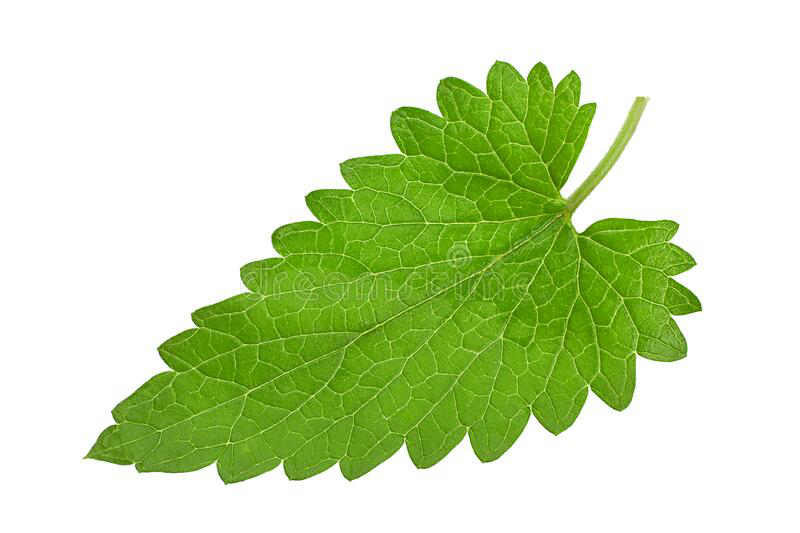

In [4]:
Catnip= list(DATADIR.glob('Catnip/*'))
print(Catnip[0])
PIL.Image.open(str(Catnip[0]))

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 29 files belonging to 10 classes.
Using 24 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 29 files belonging to 10 classes.
Using 5 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Agati leaves', 'Aloe Vera', 'Basil', 'Betel', 'Catnip', 'Indian Borage', 'Lemon Balm', 'Neem', 'Rosemary', 'pepper mint']


In [8]:
import imghdr
import os
import cv2

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext


In [9]:
import matplotlib.pyplot as plt

DATADIR='C:/Users/SARITHA/Desktop/Herbal Plant Identification/images'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(DATADIR, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')



processing class directory  Agati leaves
processing class directory  Aloe Vera
processing class directory  Basil
processing class directory  Betel
processing class directory  Catnip
processing class directory  Indian Borage
processing class directory  Lemon Balm
processing class directory  Neem
processing class directory  pepper mint
processing class directory  Rosemary
 no improper image files were found


In [10]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


C:\Users\SARITHA\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 9s 9s/step - loss: 2.3125 - accuracy: 0.0833 - val_loss: 3.1054 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 2.4182 - accuracy: 0.1250 - val_loss: 3.2490 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 2.4512 - accuracy: 0.1667 - val_loss: 2.5485 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 2.0596 - accuracy: 0.3333 - val_loss: 2.3258 - val_accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 1.9211 - accuracy: 0.5833 - val_loss: 2.2828 - val_accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 1.7918 - accuracy: 0.4583 - val_loss: 2.3294 - val_accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 1.5186 - accuracy: 0.8750 - val_loss: 2.4139 - val_accuracy: 0.0000e+00
Epoch 8/10
1/1 [====================

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(10)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=10)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

C:\Users\SARITHA\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\SARITHA\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 102ms/step


Traceback (most recent call last):
  File "C:\Users\SARITHA\anaconda3\lib\site-packages\gradio\routes.py", line 281, in predict
    output = await app.blocks.process_api(body, username, session_state)
  File "C:\Users\SARITHA\anaconda3\lib\site-packages\gradio\blocks.py", line 405, in process_api
    block.postprocess(prediction_value)
AttributeError: 'Interpretation' object has no attribute 'postprocess'


1/1 [==============================] - 0s 413ms/step
